In [3]:
import pandas as pd

In [4]:
dataset=pd.read_csv("PrePlacement.csv")

In [5]:
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [6]:
import numpy as np
import seaborn as sns

C:\Users\Suresh\AppData\Local\Temp\ipykernel_16616\3982915385.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["etest_p"])


<Axes: xlabel='etest_p', ylabel='Density'>

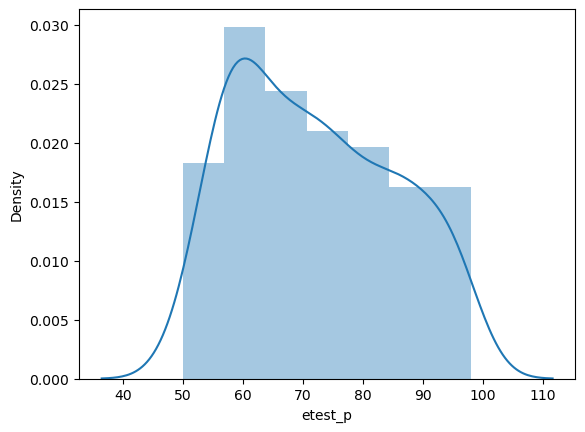

In [7]:
sns.distplot(dataset["etest_p"])

In [8]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    ax=sns.distplot(dataset, kde=True, kde_kws={'color':'blue'}, color='Green')
    pyplot.axvline(startrange, color='Red')
    pyplot.axvline(endrange, color='Red')
    sample=dataset
    sample_mean=sample.mean()
    sample_std=sample.std()
    print("Mean=%.3f, Standard Deviation=%.3f" %(sample_mean,sample_std))
    dist=norm(sample_mean, sample_std)
    values=[value for value in range(startrange, endrange)]
    probabilities=[dist.pdf(value) for value in values]
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange, endrange,prob))
    return prob

Mean=66.370, Standard Deviation=7.359
The area between range(40,60):0.1749383968302841


C:\Users\Suresh\AppData\Local\Temp\ipykernel_16616\442023226.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(dataset, kde=True, kde_kws={'color':'blue'}, color='Green')


0.1749383968302841

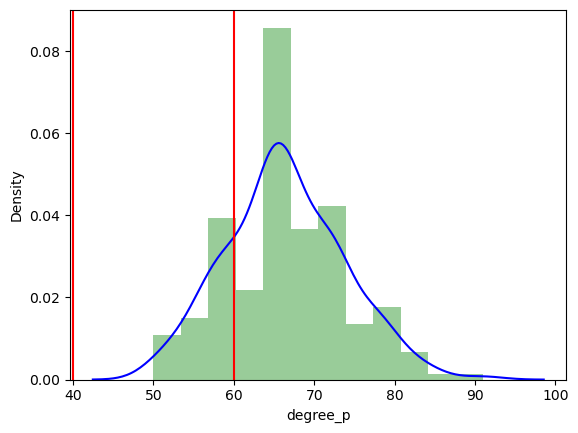

In [10]:
get_pdf_probability(dataset["degree_p"], 40, 60)

Mean=66.370, Standard Deviation=7.359
The area between range(70,70):0


C:\Users\Suresh\AppData\Local\Temp\ipykernel_16616\442023226.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(dataset, kde=True, kde_kws={'color':'blue'}, color='Green')


0

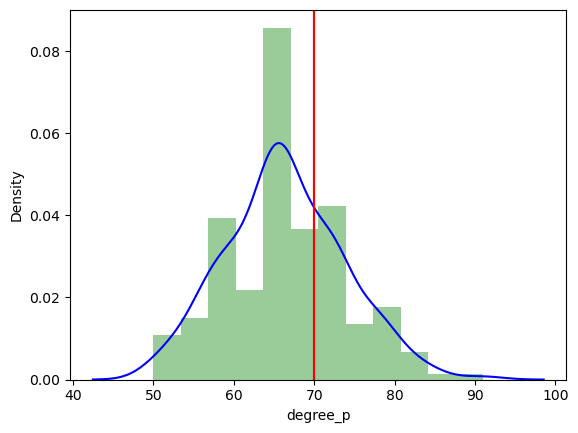

In [11]:
get_pdf_probability(dataset["degree_p"], 70, 70)

# Cumulative Normal Distribution

In [13]:
from statsmodels.distributions.empirical_distribution import ECDF

In [14]:
ecdf=ECDF(dataset["hsc_p"])
ecdf(65)

0.5162790697674419

In [15]:
ecdf=ECDF(dataset["mba_p"])
ecdf(73)

0.958139534883721

# standard normal distribution

In [20]:
def stdNBgraph(dataset):
    mean=dataset.mean()
    std=dataset.std()
    values=[i for i in dataset]
    z_score=[((j-mean)/std) for j in values]
    sns.distplot(z_score, kde=True)
    sum(z_score)/len(z_score)



C:\Users\Suresh\AppData\Local\Temp\ipykernel_16616\474430592.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score, kde=True)


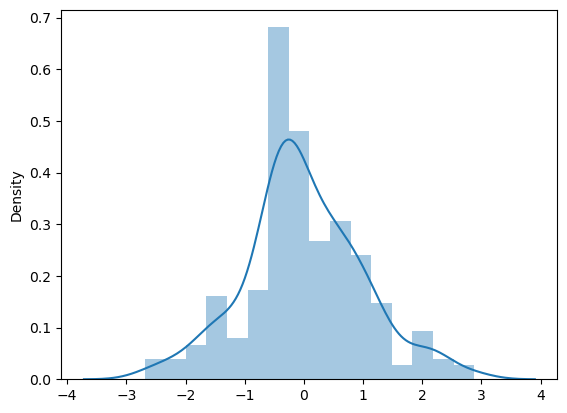

In [21]:
stdNBgraph(dataset["hsc_p"])